In [2]:
import os
from IPython.display import Image 
from PIL import Image as Image_2
# img = Image.open('1.jpg')
# new_img.save('1-256x256.png','png')
# new_img = img.resize((256,256))

## Clasificación

La clasificación es un área muy importante del aprendizaje automático supervisado. Una gran cantidad de problemas importantes de aprendizaje automático se encuentran dentro de esta área. Hay muchos métodos de clasificación y la regresión logística es uno de ellos.

### ¿Qué es la clasificación?
Los algoritmos de aprendizaje automático supervisados definen modelos que capturan las relaciones entre los datos. La clasificación es un área de aprendizaje automático supervisado que intenta predecir a qué clase o categoría pertenece una entidad, en función de sus características.

Por ejemplo, puede analizar a los empleados de alguna empresa e intentar establecer una dependencia de las características o variables, como el nivel de educación, el número de años en el puesto actual, la edad, el salario, las probabilidades de ser ascendido, etc. El conjunto de datos relacionados con un solo empleado es una observación. Las características o variables pueden adoptar una de dos formas:

1. **Las variables independientes**, también llamadas entradas o predictores, no dependen de otras características de interés (o al menos lo asume a los efectos del análisis).

2. **Las variables dependientes**, también llamadas salidas o respuestas, dependen de las variables independientes.

En el ejemplo anterior, en el que está analizando a los empleados, puede suponer que el nivel de educación, el tiempo en el puesto actual y la edad son mutuamente independientes y considerarlos como entradas. El salario y las probabilidades de promoción podrían ser los productos que dependen de los insumos.

<small>*Nota: Los algoritmos de aprendizaje automático supervisados analizan una serie de observaciones e intentan expresar matemáticamente la dependencia entre las entradas y las salidas. Estas representaciones matemáticas de dependencias son los modelos.*</small>

La naturaleza de las variables dependientes diferencia los problemas de regresión y clasificación. Los problemas de regresión tienen salidas continuas y generalmente ilimitadas. Un ejemplo es cuando está estimando el salario en función de la experiencia y el nivel de educación. Por otro lado, los problemas de clasificación tienen salidas discretas y finitas llamadas clases o categorías . Por ejemplo, predecir si un empleado será ascendido o no (verdadero o falso) es un problema de clasificación.

Hay dos tipos principales de problemas de clasificación:

1. **Clasificación binaria o binomial:** exactamente dos clases para elegir (generalmente 0 y 1, verdadero y falso, o positivo y negativo)

2. **Clasificación multiclase o multinomial:** tres o más clases de salidas para elegir

Si solo hay una variable de entrada, generalmente se indica con 𝑥. Para más de una entrada, normalmente verá la notación vectorial 𝐱 = (𝑥₁,…, 𝑥ᵣ), donde 𝑟 es el número de predictores (o características independientes). La variable de salida a menudo se denota con 𝑦 y toma los valores 0 o 1.

### ¿Cuándo se necesita la clasificación?

Puede aplicar la clasificación en muchos campos de la ciencia y la tecnología. Por ejemplo, los algoritmos de clasificación de texto se utilizan para separar correos electrónicos legítimos y spam, así como comentarios positivos y negativos. Puede consultar la Clasificación práctica de texto con Python y Keras para obtener información sobre este tema. Otros ejemplos incluyen aplicaciones médicas, clasificación biológica, calificación crediticia y más.

Las tareas de reconocimiento de imágenes a menudo se representan como problemas de clasificación. Por ejemplo, puede preguntar si una imagen representa un rostro humano o no, o si es un ratón o un elefante, o qué dígito del cero al nueve representa, y así sucesivamente. Para obtener más información sobre esto, consulte Detección facial tradicional con Python y Reconocimiento facial con Python, en Menos de 25 líneas de código .

### Descripción general de la regresión logística

La regresión logística es una técnica de clasificación fundamental. Pertenece al grupo de clasificadores lineales y es algo similar a la regresión polinomial y lineal . La regresión logística es rápida y relativamente sencilla, y es conveniente para usted interpretar los resultados. Aunque es esencialmente un método de clasificación binaria, también se puede aplicar a problemas multiclase.

### Requisitos previos de matemáticas
Necesitará comprender la función sigmoidea y la función logaritmo natural para comprender qué es la regresión logística y cómo funciona.

Esta imagen muestra la función sigmoidea (o curva en forma de S) de alguna variable 𝑥:

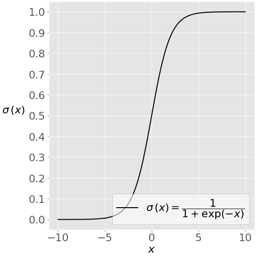

In [11]:
# ima1=Image(filename='imagenes/sigmoidea_1.jpg')
ima1=Image_2.open('imagenes/sigmoidea_1.jpg')
ima1.resize((256,256))

La función sigmoidea tiene valores muy cercanos a 0 o 1 en la mayor parte de su dominio. Este hecho lo hace apto para su aplicación en métodos de clasificación.

Esta imagen muestra el logaritmo natural log (𝑥) de alguna variable 𝑥, para valores de 𝑥 entre 0 y 1:

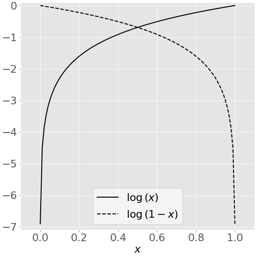

In [12]:
# Image(filename='imagenes/ln_1.jpg')
ima1=Image_2.open('imagenes/ln_1.jpg')
ima1.resize((256,256))

A medida que 𝑥 se acerca a cero, el logaritmo natural de 𝑥 cae hacia el infinito negativo. Cuando 𝑥 = 1, log (𝑥) es 0. Lo contrario es cierto para log (1 - 𝑥).

Tenga en cuenta que a menudo encontrará el logaritmo natural denotado con ln en lugar de log . En Python, math.log(x)y numpy.log(x)representa el logaritmo natural de x, por lo que seguirás esta notación en este tutorial.

### Formulación del problema

En este tutorial, verá una explicación del caso común de regresión logística aplicada a la clasificación binaria. Cuando está implementando la regresión logística de alguna variable dependiente 𝑦 en el conjunto de variables independientes 𝐱 = (𝑥₁,…, 𝑥ᵣ), donde 𝑟 es el número de predictores (o entradas), comienza con los valores conocidos de los predictores 𝐱ᵢ y la correspondiente respuesta real (o salida) 𝑦ᵢ para cada observación 𝑖 = 1,…, 𝑛.

Su objetivo es encontrar la función de regresión logística 𝑝 (𝐱) tal que las respuestas predichas 𝑝 (𝐱ᵢ) estén lo más cerca posible de la respuesta real 𝑦ᵢ para cada observación 𝑖 = 1,…, 𝑛. Recuerde que la respuesta real puede ser solo 0 o 1 en problemas de clasificación binaria. Esto significa que cada 𝑝 (𝐱ᵢ) debe estar cerca de 0 o 1. Por eso es conveniente usar la función sigmoidea.

Una vez que tenga la función de regresión logística 𝑝 (𝐱), puede usarla para predecir las salidas de entradas nuevas y no vistas, asumiendo que la dependencia matemática subyacente no cambia.

### Supuestos

* La relación lineal entre las variables independientes continuas y las probabilidades logarítmicas de la variable dependiente.

* No hay multicolinealidad entre las variables independientes (las variables independientes no deben estar altamente correlacionadas). La multicolinealidad se puede probar utilizando el factor de inflación de varianza (VIF).

* Sin valores atípicos influyentes.

* Independencia de errores (residuales) o sin autocorrelación significativa. Los residuos no deben correlacionarse entre sí. Esto se puede probar mediante la prueba de Durbin-Watson.

* El tamaño de la muestra debe ser grande (se recomiendan al menos 50 observaciones por variable independiente).

#### ¿Qué es el VIF?
[VIF](https://www.investopedia.com/terms/v/variance-inflation-factor.asp)

### Metodología

La regresión logística es un clasificador lineal, por lo que utilizará una función lineal 𝑓 (𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, también llamada logit. Las variables 𝑏₀, 𝑏₁,…, 𝑏ᵣ son los estimadores de los coeficientes de regresión, que también se denominan ponderaciones predichas o simplemente coeficientes.

La función de regresión logística 𝑝 (𝐱) es la función sigmoidea de 𝑓 (𝐱): 𝑝 (𝐱) = 1 / (1 + exp (−𝑓 (𝐱)). Como tal, a menudo está cerca de 0 o 1. La La función 𝑝 (𝐱) a menudo se interpreta como la probabilidad predicha de que la salida para un 𝐱 dado sea igual a 1. Por lo tanto, 1 - 𝑝 (𝑥) es la probabilidad de que la salida sea 0.

La regresión logística determina los mejores pesos predichos 𝑏₀, 𝑏₁,…, 𝑏ᵣ de manera que la función 𝑝 (𝐱) sea lo más cercana posible a todas las respuestas reales 𝑦ᵢ, 𝑖 = 1,…, 𝑛, donde 𝑛 es el número de observaciones. El proceso de calcular las mejores ponderaciones utilizando las observaciones disponibles se denomina entrenamiento o ajuste del modelo.

Para obtener las mejores ponderaciones, normalmente se maximiza la función de verosimilitud logarítmica (LLF) para todas las observaciones 𝑖 = 1,…, 𝑛. Este método se denomina estimación de máxima verosimilitud y está representado por la ecuación LLF = Σᵢ (𝑦ᵢ log (𝑝 (𝐱ᵢ)) + (1 - 𝑦ᵢ) log (1 - 𝑝 (𝐱ᵢ))).

Cuando 𝑦ᵢ = 0, el LLF para la observación correspondiente es igual a log (1 - 𝑝 (𝐱ᵢ)). Si 𝑝 (𝐱ᵢ) está cerca de 𝑦ᵢ = 0, entonces log (1 - 𝑝 (𝐱ᵢ)) está cerca de 0. Este es el resultado que desea. Si 𝑝 (𝐱ᵢ) está lejos de 0, entonces log (1 - 𝑝 (𝐱ᵢ)) cae significativamente. No desea ese resultado porque su objetivo es obtener el LLF máximo. De manera similar, cuando 𝑦ᵢ = 1, el LLF para esa observación es 𝑦ᵢ log (𝑝 (𝐱ᵢ)). Si 𝑝 (𝐱ᵢ) está cerca de 𝑦ᵢ = 1, entonces log (𝑝 (𝐱ᵢ)) está cerca de 0. Si 𝑝 (𝐱ᵢ) está lejos de 1, entonces log (𝑝 (𝐱ᵢ)) es un número negativo grande.

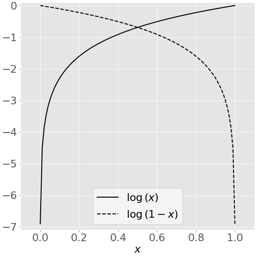

In [13]:
ima1=Image_2.open('imagenes/ln_1.jpg')
ima1.resize((256,256))

Hay varios enfoques matemáticos que calcularán los mejores pesos que corresponden al LLF máximo, pero eso está más allá del alcance de este tutorial. Por ahora, puede dejar estos detalles a las bibliotecas de Python de regresión logística que aprenderá a usar aquí.

Una vez que determine los mejores pesos que definen la función 𝑝 (𝐱), puede obtener las salidas predichas 𝑝 (𝐱ᵢ) para cualquier entrada dada given. Para cada observación 𝑖 = 1,…, 𝑛, la salida predicha es 1 si 𝑝 (𝐱ᵢ)> 0.5 y 0 en caso contrario. El umbral no tiene que ser 0,5, pero normalmente lo es. Puede definir un valor más bajo o más alto si es más conveniente para su situación.

Hay una relación más importante entre 𝑝 (𝐱) y 𝑓 (𝐱), que es que log (𝑝 (𝐱) / (1 - 𝑝 (𝐱))) = 𝑓 (𝐱). Esta igualdad explica por qué 𝑓 (𝐱) es el logit . Implica que 𝑝 (𝐱) = 0.5 cuando 𝑓 (𝐱) = 0 y que la salida predicha es 1 si 𝑓 (𝐱)> 0 y 0 en caso contrario.

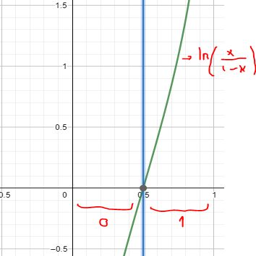

In [14]:
ima1=Image_2.open('imagenes/fx.jpg')
ima1.resize((256,256))

### Optimizar el umbral
[threshold](https://discuss.analyticsvidhya.com/t/threshold-for-logistic-regression/18481/2)

### Metricas

#### 1.Matriz de confusión

Una matriz de confusión es una tabla que se usa a menudo para describir el desempeño de un modelo de clasificación (o "clasificador") en un conjunto de datos de prueba para los cuales se conocen los valores verdaderos.

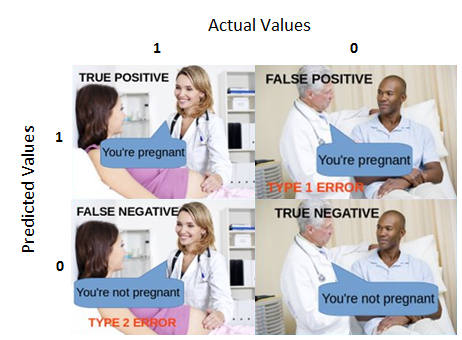

In [26]:
Image_2.open('imagenes/matriz_confusion_2.jpg')

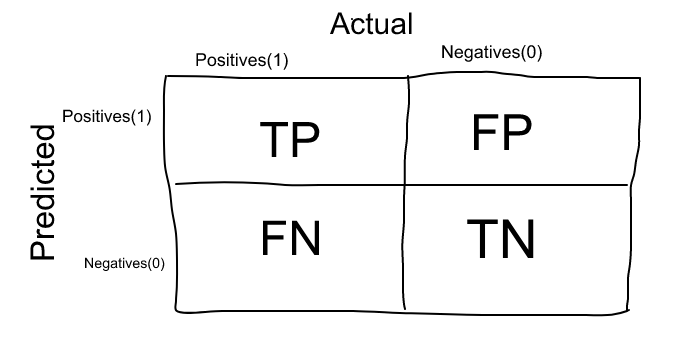

In [18]:
Image_2.open('imagenes/matriz_confusion.jpg')

1. Verdaderos positivos (TP): los verdaderos positivos son los casos en los que la clase real del punto de datos fue 1 (Verdadero) y la predicción también es 1 (Verdadero)

Ejemplo: el caso en el que una persona tiene cáncer (1) y el modelo que clasifica su caso como cáncer (1) se clasifica como positivo verdadero.

2. Negativos verdaderos (TN): Los negativos verdaderos son los casos en los que la clase real del punto de datos era 0 (Falso) y la predicción también es 0 (Falso)

Ejemplo: El caso en el que una persona que NO tiene cáncer y el modelo que clasifica su caso como No cáncer se incluye en Verdaderos Negativos.

3. Falsos positivos (FP): Los falsos positivos son los casos en que la clase real del punto de datos fue 0 (Falso) y la predicción es 1 (Verdadero). Falso es porque el modelo ha predicho incorrectamente y es positivo porque la clase predicha fue positiva. (1)

Ejemplo: una persona que NO tiene cáncer y el modelo que clasifica su caso como cáncer se incluye en falsos positivos.

4. Falsos negativos (FN): Los falsos negativos son los casos en los que la clase real del punto de datos fue 1 (Verdadero) y la predicción es 0 (Falso). Falso es porque el modelo ha predicho incorrectamente y negativo porque la clase predicha fue negativa. (0)

Ejemplo: una persona que tiene cáncer y el modelo que clasifica su caso como No-cáncer se incluye en los falsos negativos.
El escenario ideal que todos queremos es que el modelo dé 0 falsos positivos y 0 falsos negativos. Pero ese no es el caso en la vida real, ya que ningún modelo NO será 100% exacto la mayoría de las veces.

#### 1.1. Accuracy

 Es una métrica que indica qué tan bien clasifica (discrimina) el modelo las clases 0 y 1.

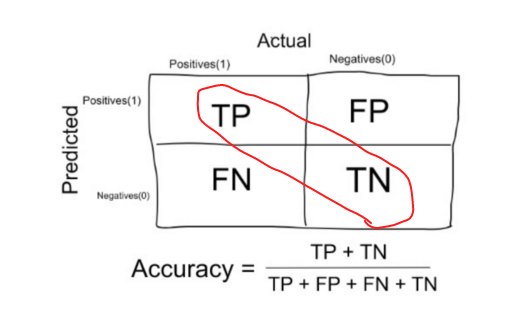

In [19]:
Image_2.open('imagenes/accuracy.jpg')

# Precision

Es una métrica que indica qué tan bien discrimina los verdaderos positivos sobre la clase pronosticada como 1.

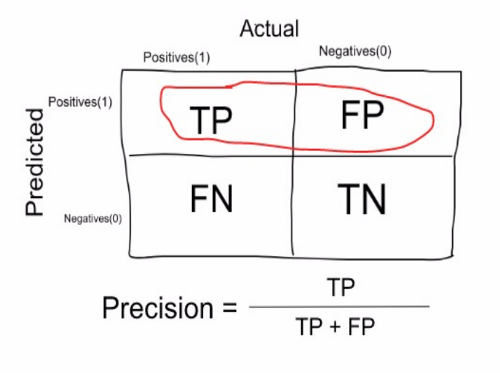

In [20]:
Image_2.open('imagenes/precision.jpg')

# Recall

Es una métrica que indica qué tan bien discrimina los verdaderos positivos sobre los ***y=1*** real.

Conocida como sensibilidad.

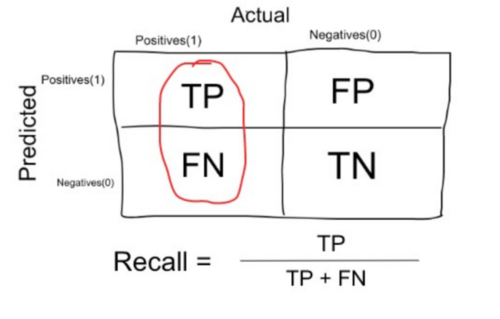

In [21]:
Image_2.open('imagenes/recall.jpg')

# Especificidad

Es una métrica que indica qué tan bien discrimina los verdaderos negativos sobre los ***y=0*** real.

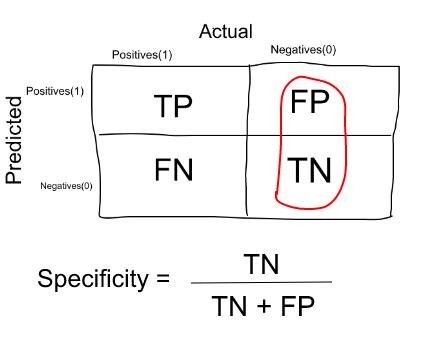

In [22]:
Image_2.open('imagenes/specificity.jpg')

# F1 Score

Es la media armónica entre las métricas Precisión y Recall.

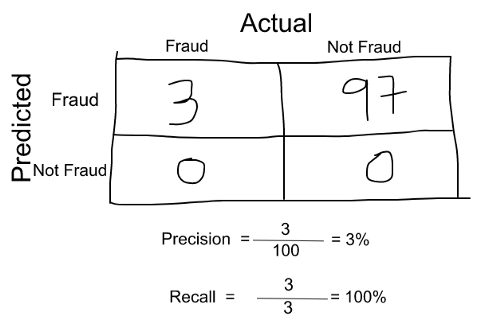

In [24]:
Image_2.open('imagenes/f1_score.jpg')

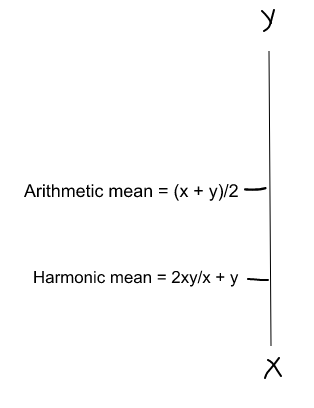

In [25]:
Image_2.open('imagenes/f1_score_2.jpg')

#### 2. ROC/AUC

https://www.youtube.com/watch?v=4jRBRDbJemM

ROC es la curva que se calcula a partir de la matriz de confusión,e.d, los puntos se obtienen por cada umbral de referencia.
AUC (es el área bajo la curva), permite comparar modelos y ver cual de ellos tiene mejores valores x cada umbral.

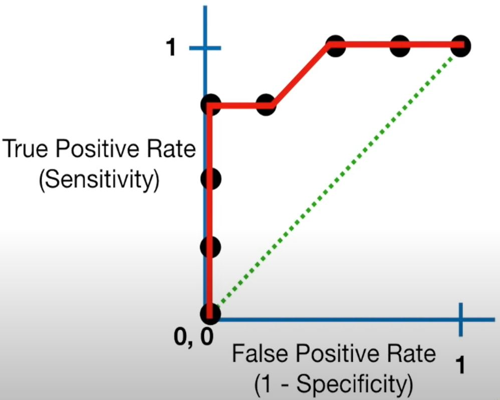

In [10]:
ima1=Image_2.open('imagenes/roc_auc_1.jpg')
ima1.resize((500,400))

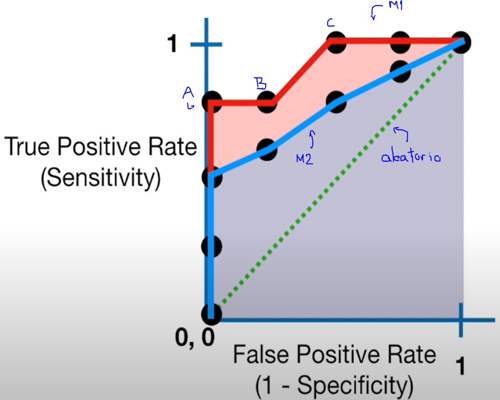

In [12]:
ima1=Image_2.open('imagenes/roc_auc_2.jpg')
ima1.resize((500,400))

### 2.2 Calculo del mejor umbral


#### 3. Cumulative gain chart

#### 4. Log loss

[metricas_1](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
[metricas_2](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)
[metricas_3](https://neptune.ai/blog/evaluation-metrics-binary-classification)
[metricas_balanceado](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

### Función de costos
[funcion_costo](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)